## 1D explicit (Forward Euler) Method

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from IPython.display import clear_output
import time

plt.rcParams.update({'font.size': 14})
from utilities import plot_phi


In [31]:
def applyBC(Nx,phi,t):

    ## Right BC
    phiR = - np.exp(-t)
    phi[-1] = phiR

        
    ## left BC
    i = 0   
    phiL = np.exp(-t)
    phi[i] = phiL

    return phi

def applyIC(Nx,phi,dx):

    for i in range(phi.shape[0]):
        x = i*dx

        phi[i] = np.cos(x)

    return phi


In [32]:
start = time.time()
Nx = 21
L = np.pi  # length

phi = np.zeros(Nx)


dx = L / (Nx - 1)  # Grid size

tol = 1e-6

aE = 1 / dx ** 2
aW = 1 / dx ** 2
a0 = -(2 / dx ** 2)

t=0
alpha = 1
dt = 0.1* (0.5 * dx**2 / alpha)
phi = applyIC(Nx, phi, dx)
phi = applyBC(Nx, phi, t)



In [33]:
# for all the interior node
phi_new = np.zeros(phi.shape)
for n in tqdm(range(1)):
    for i in range(1,Nx-1):
        
        phi_new[i] = phi[i] + (alpha * dt / dx**2) * (phi[i+1] - 2*phi[i] + phi[i-1])

    t = dt*n
    phi_new = applyBC(Nx,phi_new,t)
    phi[1:-1] = phi_new[1:-1]

100%|██████████| 1/1 [00:00<00:00, 9362.29it/s]


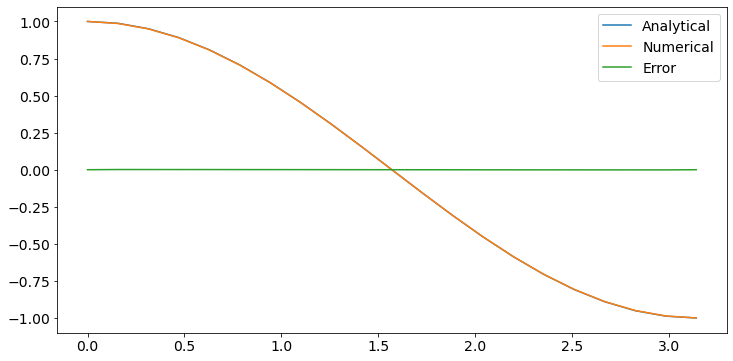

In [34]:
# Analytical solution
x = np.linspace(0,np.pi,Nx)

phi_A = np.zeros(Nx)
for i in range(Nx):

        
    phi_A[i] = np.exp(-t)*np.cos(x[i])
error = phi_A - phi

plt.figure(figsize=(12,6))
plt.plot(x,phi_A, label='Analytical')
plt.plot(x,phi_new, label='Numerical')
plt.plot(x,error, label='Error')
plt.legend()
# plt.ylim([-0.5,0.5])